In [22]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [3]:
#实例化数据集，探索数据
faces = fetch_lfw_people(min_faces_per_person=60)
#min_faces_per_person 每个人最少的脸图

In [4]:
faces

{'data': array([[188.66667  , 187.33333  , 187.66667  , ...,  86.333336 ,
          84.666664 ,  83.       ],
        [ 35.666668 ,  34.       ,  33.       , ..., 191.       ,
         183.       , 173.66667  ],
        [ 74.       ,  78.333336 ,  88.666664 , ...,  97.666664 ,
          99.       ,  97.666664 ],
        ...,
        [ 39.       ,  51.       ,  67.666664 , ..., 214.33333  ,
         164.       ,  77.333336 ],
        [ 34.       ,  35.666668 ,  42.666668 , ..., 112.666664 ,
         112.333336 , 114.       ],
        [  1.3333334,   2.       ,   3.3333333, ...,  64.333336 ,
          33.666668 ,   6.6666665]], dtype=float32),
 'images': array([[[188.66667  , 187.33333  , 187.66667  , ...,  95.333336 ,
           73.666664 ,  34.       ],
         [187.33333  , 186.       , 186.33333  , ...,  96.       ,
           74.       ,  35.       ],
         [186.66667  , 186.       , 185.33333  , ...,  94.333336 ,
           74.333336 ,  35.666668 ],
         ...,
         [121.

In [5]:
faces.images.shape #三维数组
# 368是矩阵中图像的个数
# 62是每个图像的特征矩阵的行
# 47是每个图像的特征矩阵的列 

(368, 62, 47)

In [6]:
faces.data.shape
# 行是样本

(368, 2914)

In [7]:
X = faces.data

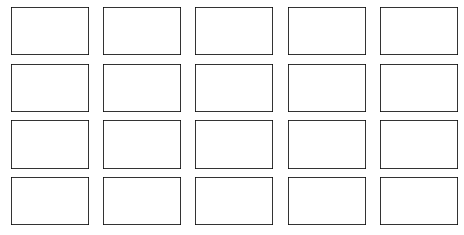

In [9]:
# 看看图像什么样？将原特征矩阵进行可视化
fig, axes = plt.subplots(4, 5 #行，列数目，展示的是框框
                        ,figsize=(8, 4)# 框框的尺寸比例 长：宽
                        ,subplot_kw = {"xticks":[], "yticks":[]}
                        )

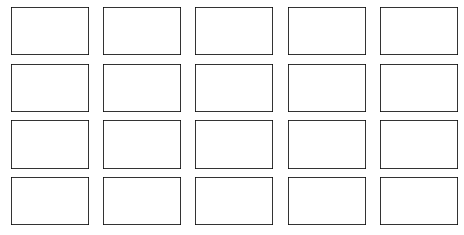

In [10]:
fig

In [11]:
axes
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9CF1CDE20>,
      dtype=object)

In [12]:
axes.shape

(4, 5)

In [ ]:
#二维结构，可以有两种循环方式，一种是使用索引，循环一次同时生成一列上的三个图
#另一种是把数据拉成一维，循环一次只生成一个图
#在这里，究竟使用哪一种循环方式，是要看我们要画的图的信息，储存在一个怎样的结构里
#我们使用 子图对象.imshow 来将图像填充到空白画布上
#而imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环

In [14]:
# [*axes.flat]  #降维
axes.flat #是一个列表

In [15]:
[*enumerate(axes.flat)]

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf1cde20>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf0b2040>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf1864f0>),
 (3, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cec01a00>),
 (4, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cebe0ee0>),
 (5, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf014460>),
 (6, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf219940>),
 (7, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf1f0e20>),
 (8, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf149340>),
 (9, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf082820>),
 (10, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf08ed00>),
 (11, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf03d220>),
 (12, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cef78700>),
 (13, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cef99c10>),
 (14, <matplotlib.axes._subplots.AxesSubplot at 0x1a9cf287130>),
 (15, <matplotlib.axes._subplots.Ax

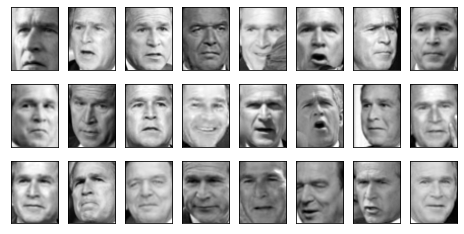

In [20]:
fig, axes = plt.subplots(3, 8 #行，列数目，展示的是框框
                        ,figsize=(8, 4)# 框框的尺寸比例 长：宽
                        ,subplot_kw = {"xticks":[], "yticks":[]}
                        )
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:] ,cmap="gray")#选择色彩的模式

In [24]:
# 建模降维，提取新特征空间矩阵
pca = PCA(150).fit(X)

In [26]:
V = pca.components_

In [29]:
V.shape

(150, 2914)

In [ ]:
# 将新特征空间矩阵可视化
# 新特征空间里的特征向量们，大部分是"五官"和"亮度"相关的向量，所以新特征向量上的信息肯定大部分原数据中和"五官"和"亮度"相关的特征中提取出来的。
# PCA能够将原始数据集中重要的数据进行聚集

In [31]:
V[0].reshape(62, 47).shape

(62, 47)

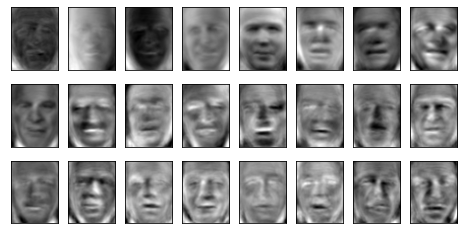

In [32]:
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")